# EDS220: Assignment 4, Task 2
## False Color Images

**Author:** Sofia Sarak

**Github repository:** https://github.com/sofiasarak/eds220-hwk4

In [2]:
import os
import geopandas as gpd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### 2. Fire Perimeter Data Exploration

The following data set was sourced from [LA County's GIS hub](https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about). It contains dissolved fire perimeters/boundaries for Eaton and Palisades fires. It is a public data set, published January 21, 2025 and last updated on February 26, 2025

In [15]:
# Read in data, using os to build file path and geopandas to read in .shp file
fp = os.path.join('data','Eaton_Perimeter_20250121','Eaton_Perimeter_20250121.shp')
eaton_perimeter = gpd.read_file(fp)

fp = os.path.join('data','Palisades_Perimeter_20250121','Palisades_Perimeter_20250121.shp')
palisades_perimeter = gpd.read_file(fp)

<Axes: >

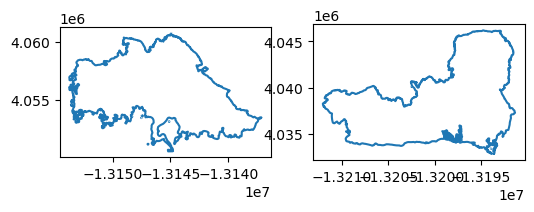

In [16]:
# Plot perimeter data to visualize its contents

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (6,4))

eaton_perimeter.boundary.plot(ax = ax[0])
palisades_perimeter.boundary.plot(ax = ax[1])

In [4]:
# What is the CRS?
print(f"The CRS of the Eaton fire perimeter data is {eaton_perimeter.crs}.")
print(f"The CRS of the Eaton fire perimeter data is {palisades_perimeter.crs}.")

The CRS of the Eaton fire perimeter data is EPSG:3857.
The CRS of the Eaton fire perimeter data is EPSG:3857.


In [7]:
# Is it projected or geographic?

# Eaton fire perimeter
print(f"The CRS of Eaton perimeter data is projected? {eaton_perimeter.crs.is_projected}")
print(f"The CRS of Eaton periemeter data is geographic? {eaton_perimeter.crs.is_geographic}")

# Palisades fire perimeter
print(f"The CRS of Palisades perimeter data is projected? {palisades_perimeter.crs.is_projected}")
print(f"The CRS of Palisades periemeter data is geographic? {palisades_perimeter.crs.is_geographic}")

The CRS of Eaton perimeter data is projected? True
The CRS of Eaton periemeter data is geographic? False
The CRS of Palisades perimeter data is projected? True
The CRS of Palisades periemeter data is geographic? False


#### Summary

From our exploration, we have determined the following:
1. Our perimeter data frames plot as one polygon object each, from which we can extract just the boundaries.
2. The CRSs of our data is EPSG:3857.
3. The CRSs is projected, not geographic.

### 3. Landsat (NetCDF) Data Import and Exploration

This data is sourced from the [Microsoft Planetary Computer catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) and clipped to an area surrounding the fire perimeters. It contains a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.

In [3]:
# Read in data, using os to build file path
fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')

# a. Import landsat data using `xr.open_dataset()`
landsat = xr.open_dataset(fp, engine="netcdf4")

In [9]:
# View first five rows of landsat data frame
landsat.head()

<xarray.Dataset> Size: 596B
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 40B 3.799e+06 3.799e+06 ... 3.799e+06 3.799e+06
  * x            (x) float64 40B 3.344e+05 3.344e+05 ... 3.345e+05 3.345e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 100B ...
    green        (y, x) float32 100B ...
    blue         (y, x) float32 100B ...
    nir08        (y, x) float32 100B ...
    swir22       (y, x) float32 100B ...
    spatial_ref  int64 8B ...

In [10]:
# What/how are the coordinates stored?
landsat.coords

Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...

In [11]:
# Dimensions
landsat.dims

FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})

In [12]:
# Data types
landsat.dtypes

Frozen({'red': dtype('float32'), 'green': dtype('float32'), 'blue': dtype('float32'), 'nir08': dtype('float32'), 'swir22': dtype('float32'), 'spatial_ref': dtype('int64')})

#### e. Summary 

From our preliminary exploration, we have determined the following:
1. `landsat` contains three kinds of coordinates: x, y (stored as floats), and time (stored as a datetime object).
2. The data variables are `red`, `green`, `blue`, `nir08`, and `swir22`, all stored as floats. These are the different bands of light that this data set stores information on. There is also another variable called `spatial_ref`, most likely storing geographic information (and is stored as an integer).
3. The x coordinate is 2742 values long and the y coordinate is 1418 values long.

### 4. Restoring geospatial information

In [13]:
# a. CRS of landsat
print(landsat.rio.crs)

None


According to `.rio.crs`, this data set does not have a CRS. It appears that it may not automatically load as a geospatial object in Python.

There is however a variable called `spatial_ref`, which may contian the spatial information we are looking for.

In [14]:
# b. Access crs through `spatial_ref` variable
crs = landsat.spatial_ref.crs_wkt
print(crs)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In order to transfrom the `landsat` data set into a geospatial object, we can use what is stored in the `spatial_ref` column to assign it a CRS.

In [15]:
# c. Recover and reassign geospatial info through .write_crs
landsat_geo = landsat.rio.write_crs(crs)

In [16]:
# d. Print new CRS info
print(landsat_geo.rio.crs)

EPSG:32611


### 5. True color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


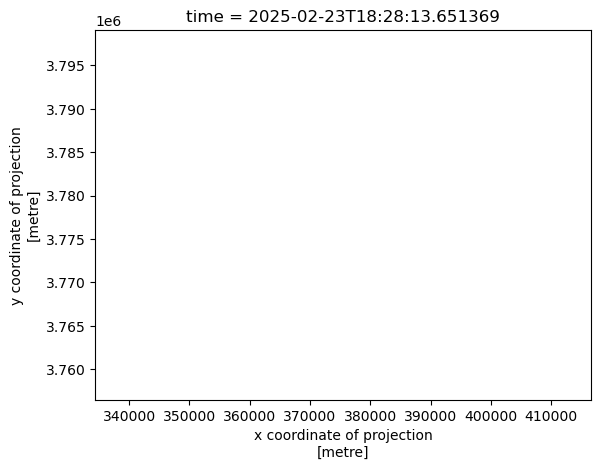

In [17]:
# a. Plot red, green, and blue variables as is
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


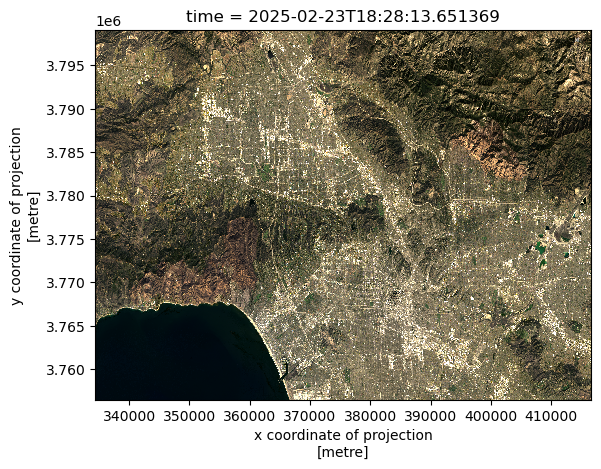

In [18]:
# b. `robust = True` argument tells .plot() to use the 2nd and 98th percentiles as min and max values
# This helps avoid the use of outliers which "smoosh" the rest of the data

landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

In [6]:
# c. Identify NA values
landsat[["red", "green", "blue"]].isnull().any()


<xarray.Dataset> Size: 11B
Dimensions:  ()
Coordinates:
    time     datetime64[ns] 8B ...
Data variables:
    red      bool 1B False
    green    bool 1B True
    blue     bool 1B True

In [10]:

# To check in which variable the NA values exist, we can check by band
print(landsat["green"].isnull().sum())
print(landsat["blue"].isnull().sum())

<xarray.DataArray 'green' ()> Size: 8B
array(1)
Coordinates:
    time     datetime64[ns] 8B ...
<xarray.DataArray 'blue' ()> Size: 8B
array(109)
Coordinates:
    time     datetime64[ns] 8B ...


According to the output above, the green band has 1 NA value and the blue band has 109 NA values.

In [11]:
# d. Substitute NA values in landsat for 0
landsat = landsat.fillna(0)

# Confirm there are no more NA values
landsat[['red', 'green', 'blue']].to_array().isnull().sum()

<xarray.DataArray ()> Size: 8B
array(0)
Coordinates:
    time     datetime64[ns] 8B ...

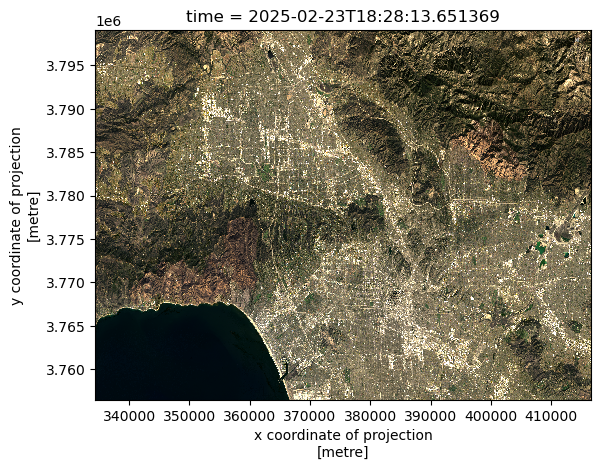

In [12]:
# e. Plot true color image (this time, without the warnings)
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

*f. In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (e).*

The output in part (a) had the x coordinates and y coordinates of the projection as its x- and y-axes, yet the plot itself was blank. This is because there were extreme outliers somewhere in our band values; as our plot tried to account for those, the range of the values we were actually interested in (most of them) were squished, and we weren't able to see any differentation in color. Hence, it was blank. These outliers most likely came from clouds in the images, which often correspond to outlier RGB values.

By adding `robust = True` to our `.imshow()` function, we were able to coerce our plot to use the 2nd and 98th percentile of our data as the minimum and maximum values `.plot()` uses when determining the scale of colors. This omits the issue of outliers, allowing us to see color in the plot in part (e).

The other error that came up in part (a) was that there was an invalid value located somewhere in our data. Although this was not visible to the naked eye (at least not to me), by filling those NA values with 0s, we were able to get a happy final plot!

### 6. False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

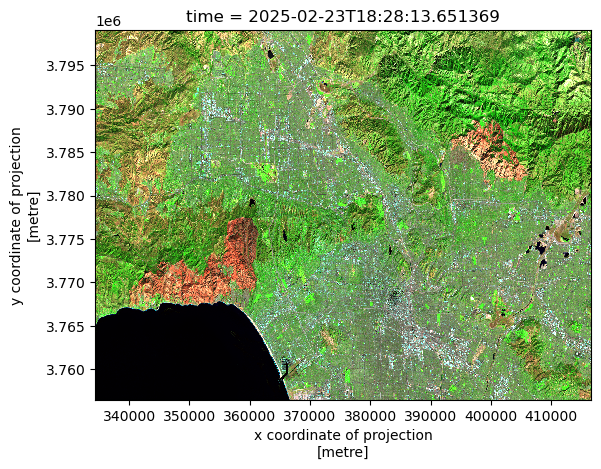

In [13]:
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

### 7. Map

Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [17]:
# Ensuring that CRSs of fire perimeter data match that of landsat

eaton_perimeter = eaton_perimeter.to_crs('epsg:32611')
palisades_perimeter = palisades_perimeter.to_crs('epsg:32611')

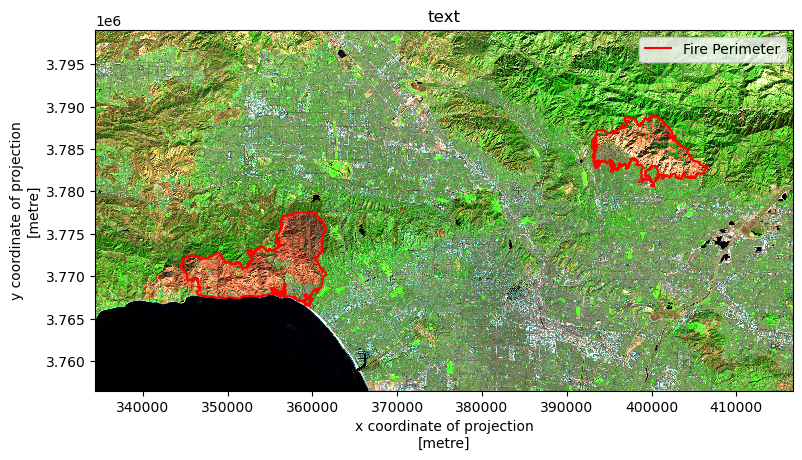

In [36]:
fig, ax = plt.subplots(figsize = (9,5))


landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True,
                                                           ax = ax)
eaton_perimeter.boundary.plot(ax = ax,
                              color = "red",
                              linewidth = 1.5,
                              label = "Fire Perimeter")
palisades_perimeter.boundary.plot(ax = ax,
                                  color = "red",
                                  linewidth = 1.5)


plt.title("text")
plt.legend()
plt.show()




In [30]:
eaton_perimeter.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((398527.261 3781198.912, 398530.857 3..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((395312.735 3782463.832, 395315.941 3..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((393445.519 3782768.065, 393430.055 3..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((400066.534 3782745.299, 400064.171 3..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((393416.663 3782883.189, 393416.667 3..."
